In [50]:
import math
import os.path
import multiprocessing
import numpy as np
from PyLTSpice import RawRead, SimRunner, SpiceEditor
from deap import algorithms, base, creator, tools
from rich.console import Console
from rich.table import Table
import pandas as pd

import CoilcraftRandomSelect as crs
import MurataRandomSelect as mrs
from LTTraceData import LTTraceData

ltr = RawRead("LTFiles/_F-416793_I-476_C1-1728_C2-1089_C3-1827_C4-2053.raw", verbose=False)

v_in = LTTraceData(ltr, 'V(vin)')
v_out = LTTraceData(ltr, 'V(vout)')
# i_in = LTTraceData(ltr, 'I(Vs)', invert=True)
i_in = LTTraceData(ltr, 'I(Vs)')
i_out = LTTraceData(ltr, 'I(R1)')

print(v_in.average)
print(v_out.average)
print(i_in.average)
print(i_out.average)

efficiency = ((v_out.average * i_out.average) / (v_in.average * i_in.average))

# acceptable_ripple_ptp = 0.1  # Volts
# if v_out.peak_to_peak > acceptable_ripple_ptp:
#     return efficiency / (1 * (acceptable_ripple_ptp - v_out.peak_to_peak))
#
# if v_out.min < 4 or v_out.max > 8:
#     return 0

print(efficiency)
print(len(i_in.data))

# data = [elem for elem in ltr.get_trace('I(Vs)').get_wave() if elem > -10]

print(ltr.get_axis())

pd.DataFrame(ltr.get_trace('I(Vs)')).to_csv("CurrentData")

total = 0.0
for pnt in ltr.get_trace('I(Vs)').get_wave(0):
    total += pnt

total / len(i_in.data)

# print(ltr.get_trace('V(vin)'))

10.0
4.955657005310059
-1.3789952993392944
0.9911313652992249
-0.3561801186690722
26534
[0.00000000e+00 4.24591119e-08 4.26482351e-08 ... 4.99142077e-04
 4.99996546e-04 5.00000000e-04]


-1.378995428729738

Reading the file with encoding  utf_16_le
File contains 5 traces, reading 5
Binary RAW file with Normal access
['time', 'V(vin)', 'V(vout)', 'I(R1)', 'I(Vs)']
OrderedDict([('Filename', WindowsPath('LTFiles/_F-416793_I-476_C1-1728_C2-1089_C3-1827_C4-2053.raw')), ('Title', '* C:\\Users\\treys\\Code\\EE490_Senior_Design_Project\\Simulation\\LTFiles\\EPC23102_Mine.asc'), ('Date', 'Fri May 26 21:17:08 2023'), ('Plotname', 'Transient Analysis'), ('Flags', 'real forward'), ('No. Variables', 5), ('No. Points', 26534), ('Offset', '2.5000000000000001e-03'), ('Command', 'Linear Technology Corporation LTspice'), ('Backannotation', 'u2:1 lin lout'), ('Variables', ['time', 'V(vin)', 'V(vout)', 'I(R1)', 'I(Vs)'])])


<Figure size 640x480 with 0 Axes>

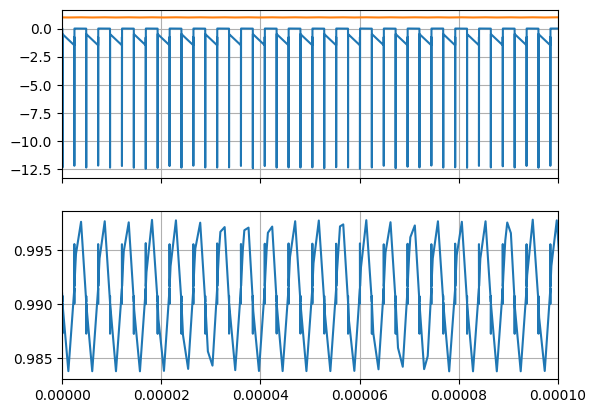

In [49]:
from PyLTSpice import RawRead
import matplotlib.pyplot as plt         # use matplotlib for plotting the results

raw = RawRead("LTFiles/_F-416793_I-476_C1-1728_C2-1089_C3-1827_C4-2053.raw")   # Read the RAW file contents from disk

print(raw.get_trace_names())            # Get and print a list of all the traces
print(raw.get_raw_property())           # Print all the properties found in the Header section

vin = raw.get_trace('I(Vs)')            # Get the trace data
vout = raw.get_trace('I(R1)')          # Get the second trace

steps = raw.get_steps()                 # Get list of step numbers ([0,1,2]) for sweeped simulations
                                        # Returns [0] if there is just 1 step

plt.figure()                            # Create the canvas for plotting

_, (ax1, ax2) = plt.subplots(2, 1, sharex=True)  # Create two subplots

for ax in (ax1, ax2):                   # Use grid on both subplots
    ax.grid(True)

plt.xlim([0, 100E-6])              # Limit the X axis to just a subrange

xdata = raw.get_axis()                  # Get the X-axis data (time)

ydata = vin.get_wave()                  # Get all the values for the 'vin' trace
ax1.plot(xdata, ydata)                  # Do an X/Y plot on first subplot

ydata = vout.get_wave()                 # Get all the values for the 'vout' trace
ax1.plot(xdata, ydata)                  # Do an X/Y plot on first subplot as well

for step in steps:                      # On the second plot, print all the STEPS of Vout
    ydata = vout.get_wave(step)         # Retrieve the values for this step
    xdata = raw.get_axis(step)          # Retrieve the time vector
    ax2.plot(xdata, ydata)              # Do X/Y plot on second subplot

plt.show()                              # Show matplotlib's interactive window with the plots

Reading the file with encoding  utf_16_le
File contains 5 traces, reading 5
Binary RAW file with Normal access
['time', 'V(vin)', 'V(vout)', 'I(R1)', 'I(Vs)']
OrderedDict([('Filename', WindowsPath('LTFiles/_F-416793_I-476_C1-1728_C2-1089_C3-1827_C4-2053.raw')), ('Title', '* C:\\Users\\treys\\Code\\EE490_Senior_Design_Project\\Simulation\\LTFiles\\EPC23102_Mine.asc'), ('Date', 'Fri May 26 21:17:08 2023'), ('Plotname', 'Transient Analysis'), ('Flags', 'real forward'), ('No. Variables', 5), ('No. Points', 26534), ('Offset', '2.5000000000000001e-03'), ('Command', 'Linear Technology Corporation LTspice'), ('Backannotation', 'u2:1 lin lout'), ('Variables', ['time', 'V(vin)', 'V(vout)', 'I(R1)', 'I(Vs)'])])


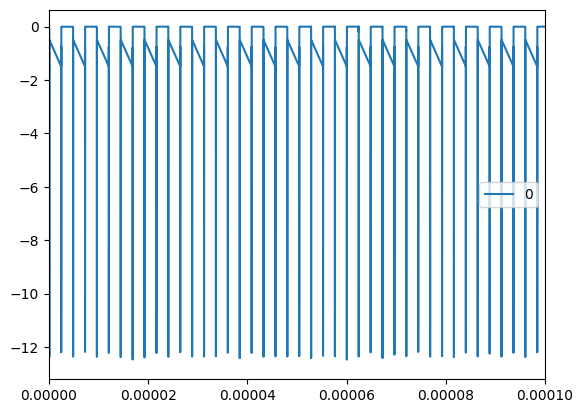

In [53]:
from PyLTSpice import RawRead

from matplotlib import pyplot as plt

LTR = RawRead("LTFiles/_F-416793_I-476_C1-1728_C2-1089_C3-1827_C4-2053.raw")

print(LTR.get_trace_names())
print(LTR.get_raw_property())

IR1 = LTR.get_trace("I(Vs)")
x = LTR.get_trace('time')  # Gets the time axis
steps = LTR.get_steps()
for step in range(len(steps)):
   # print(steps[step])
   plt.plot(x.get_wave(step), IR1.get_wave(step), label=steps[step])
plt.xlim([0, 100E-6])
plt.legend()  # order a legend
plt.show()

In [57]:
s = pd.Series([0, 1, np.nan, np.nan, 4])
print(s)
print(s.interpolate())

0    0.0
1    1.0
2    NaN
3    NaN
4    4.0
dtype: float64
0    0.0
1    1.0
2    2.0
3    3.0
4    4.0
dtype: float64


In [72]:
import math
ltr = RawRead("LTFiles/_F-416793_I-476_C1-1728_C2-1089_C3-1827_C4-2053.raw", verbose=False)

v_in = LTTraceData(ltr, 'V(vin)')
v_out = LTTraceData(ltr, 'V(vout)')
# i_in = LTTraceData(ltr, 'I(Vs)', invert=True)
i_in = LTTraceData(ltr, 'I(Vs)')
i_out = LTTraceData(ltr, 'I(R1)')

print(v_in.average)
print(v_out.average)
print(i_in.average)
print(i_out.average)

efficiency = ((v_out.average * i_out.average) / (v_in.average * i_in.average))

# acceptable_ripple_ptp = 0.1  # Volts
# if v_out.peak_to_peak > acceptable_ripple_ptp:
#     return efficiency / (1 * (acceptable_ripple_ptp - v_out.peak_to_peak))
#
# if v_out.min < 4 or v_out.max > 8:
#     return 0

print(efficiency)
print(len(i_in.data))

# data = [elem for elem in ltr.get_trace('I(Vs)').get_wave() if elem > -10]

print(ltr.get_axis())

pd.DataFrame(ltr.get_trace('I(Vs)')).to_csv("CurrentData")

interpolation_steps = 20

base = pd.Series(data=[np.nan]*len(i_in.data)*interpolation_steps)

data = pd.Series(ltr.get_trace('I(Vs)'))

for i in range(len(i_in.data)*interpolation_steps):
    if i % interpolation_steps == 0:
        base.iat[i] = data.iat[math.floor(i / interpolation_steps)]

interp = base.interpolate()
# interp
print(np.average(interp))

# for i in base[0::5]:
#     i = data[]


# total = 0.0
# for pnt in pd.Series(ltr.get_trace('I(Vs)')):
    # total += pnt

# total / len(i_in.data)


10.0
4.955657005310059
-1.3789952993392944
0.9911313652992249
-0.3561801186690722
26534
[0.00000000e+00 4.24591119e-08 4.26482351e-08 ... 4.99142077e-04
 4.99996546e-04 5.00000000e-04]
-1.3790108120043043


In [2]:
from PyLTSpice.LTSteps import LTSpiceLogReader

data = LTSpiceLogReader(log_filename = "LTFiles/_F-220691_I-157_C1-1305_C2-1030_C3-1230_C4-272.log")

# print("Number of steps  :", data.step_count)
# step_names = data.get_step_vars()
meas_names = data.get_measure_names()

print(data.get_measure_value('eff'))

# Printing Headers
# print(' '.join([f"{step:15s}" for step in step_names]), end='')  # Print steps names with no new line
print(' '.join([f"{name:15s}" for name in meas_names]), end='\n')
# Printing data
# for i in range(data.step_count):
#     print(' '.join([f"{data[step][i]:15}" for step in step_names]), end='')  # Print steps names with no new line
#     print(' '.join([f"{data[name][i]:15}" for name in meas_names]), end='\n')  # Print Header

# print("Total number of measures found :", data.measure_count)

Processing LOG file LTFiles/_F-220691_I-157_C1-1305_C2-1030_C3-1230_C4-272.log
15 measurements
Identified 0 steps, read 5 measurements


KeyError: 'eff'